# AFM等のデータを可視化及び成形したい

やる事(やりたい事)
- データの導入
- データの可視化
- データの整形
- 


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import csv
import pathlib


#from matplotlib import pyplot as plt


os.chdir(r'C:\Users\safut\OneDrive\デスクトップ\masuda@310\sic-dmos20211025\q01')

xcell=256 #行の数
ycell=64  #列の数

col_names = [ 'c{0:02d}'.format(i) for i in range(256) ]
# 読んでみる
df=pd.read_csv( r'20211024_009_scfm.csv', sep=',', names=col_names )
print(df)


ModuleNotFoundError: No module named 'numpy'

# 256*256の二次元データ配列の整形

- AFMのデータは.xqu等の独自の拡張子を利用しているため、変更が必要

- エクセル.csvファイルをpandas-read_csvで導入する


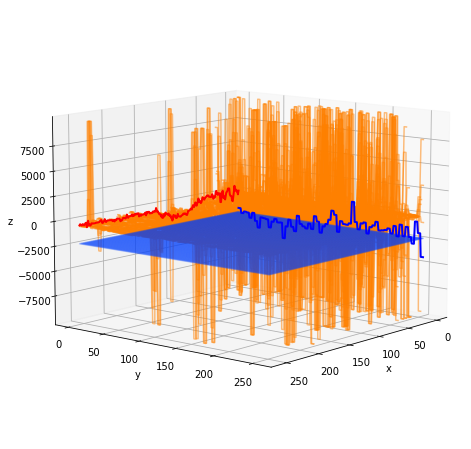

-568.1628144189442


<Figure size 432x288 with 0 Axes>

In [ ]:

p_data_k=0 #合計を求める変数


f_lanp_k=[]
for i in range(xcell):
    t=[]

    for j in range(ycell):
        for k in range(4):   #列の数を伸ばす
            t.append(float(df['c{0:02d}'.format(i)][j+2])) #最初の2行は説明文
        p_data_k=p_data_k+float(df['c{0:02d}'.format(i)][j+2])

    f_lanp_k.append(t)

#print(f_lanp[1])

    
#print(len(f_lanp_k),len(f_lanp_k[0]),len(f_lanp_k[-1]))
#print(f_lanp_k[0],f_lanp_k[-1])



#3次元図の導入
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')

ii=[]
for i in range(xcell):
    ii.append(i)
    
for i in range(len(f_lanp_k)):
    pp=[]
    for j in range(len(f_lanp_k[i])):
        pp.append(i)
    

    ax.plot(pp,ii,f_lanp_k[i],color="#ff8000", alpha=0.5)
    #ax.plot(pp,ii,p0[i], alpha=0.5)
#ax.plot(0,0,256*256/p_data, alpha=0.1)


#平均面を導入
z=[]
for i in range(xcell):
    z.append(p_data_k*4/(xcell*ycell))
    
for i in range(xcell):
    pp=[]
    for j in range(xcell):
        pp.append(i)
    

    ax.plot(pp,ii,z,color="#0040ff", alpha=0.2)
    
#縦と横のヒストグラムの平均
histy=[]
histx=[]
z=[]

#行と列の平均を導入
for i in range(xcell):
    tempy=0
    tempx=0
    z.append(0)
    
    for j in range(xcell):
        tempy=tempy+f_lanp_k[j][i]
        tempx=tempx+f_lanp_k[i][j]
                
    histy.append(tempy/ycell)
    histx.append(tempx/xcell)
    
ax.plot(z,ii, histy, color="blue", lw=2)
ax.plot(ii,z, histx, color="red", lw=2)

# 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=10, azim=40)    #elev:縦方向の回転()   azim:横方向の回転 

plt.show()
plt.savefig(r"aaaa")

print(p_data_k/(xcell*ycell))
        


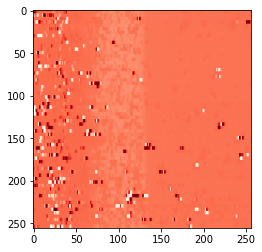

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img=np.array(f_lanp_k)



fig, ax = plt.subplots()
ax.imshow(img.T, cmap="Reds")

plt.show()

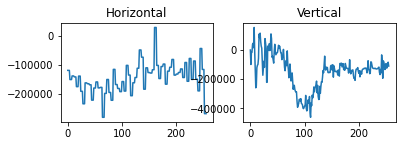

In [ ]:
histy=[]
histx=[]

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure()

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)


for i in range(256):
    tempy=0
    tempx=0
    for j in range(256):
        tempy=tempy+f_lanp_k[j][i]
        tempx=tempx+f_lanp_k[i][j]
    histy.append(tempy)
    histx.append(tempx)

ax1.plot(ii, histy)
ax2.plot(ii, histx)
#fig1=plt.plot(ii, histy)
#fig2=plt.plot(ii, histx)

ax1.set_title( 'Horizontal') #凡例
ax2.set_title( 'Vertical') #凡例

plt.show()

# 3σ外れ値除外

正規分布の外れ値を除外


## 復習

σ  はデータ（または確率分布）の標準偏差（ばらつきを表す量）です
$$
    x_{average} = \frac{1}{N}\sum_{i=1}^{N} x_i
$$

$$
    \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i-x_{average})}
$$

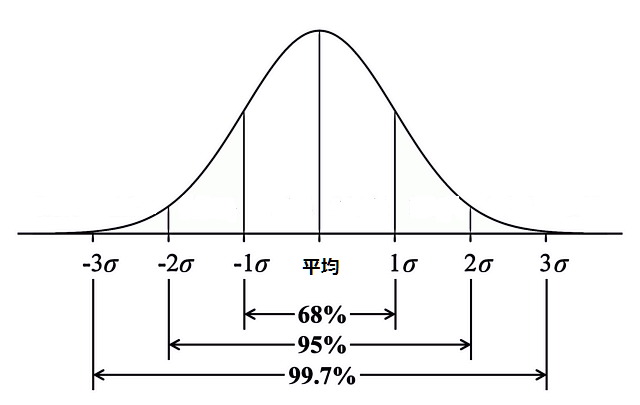

In [ ]:
# pillowをインポート
from PIL import Image

# 画像パス
filename = r"sei.png"

# Pillowで開く
im = Image.open(filename)

# 表示
im

In [ ]:
import math
m=p_data_k/(xcell*xcell)
s=0
p=0

for i in f_lanp_k:
    for j in i:
        s=s+(j-m)**2
        p=p+j
        
std=math.sqrt(s/(xcell*xcell))




t_lanp=[]
new_m=0
flug=0
for i in range(256):
    tl=[]
    for j in range(256):
        if f_lanp_k[i][j]>m+std*3:
            tl.append(m)
        elif f_lanp_k[i][j]<m-std*3:
            tl.append(m)
        else:
            tl.append(f_lanp_k[i][j])
            new_m=new_m+f_lanp_k[i][j]
        flug+=1
    t_lanp.append(tl)

  
print(len(t_lanp),len(t_lanp[-1]))

img=np.array(t_lanp)



x=np.array(f_lanp_k)
y=np.array(t_lanp)

fig = plt.figure()

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#ax3 = fig.add_subplot(1, 3, 3)


ax1.imshow(x.T,cmap='Reds')
ax2.imshow(y.T,cmap='Reds')
#ax3.imshow(x*3,cmap='Blues')
#ax3.imshow(y*3,cmap='Reds', alpha=0.7)
plt.show()


NameError: name 'p_data_k' is not defined

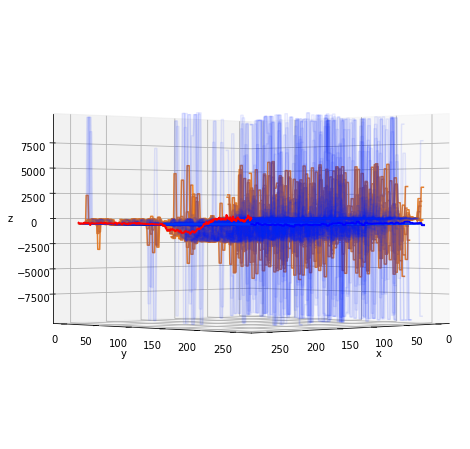

-568.0673310204938


In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')

ii=[]
for i in range(256):
    ii.append(i)
    
for i in range(len(t_lanp)):
    pp=[]
    for j in range(256):
        pp.append(i)
    

    ax.plot(pp,ii,t_lanp[i],color="#ff8000", alpha=0.9)
    #ax.plot(pp,ii,p0[i], alpha=0.5)

for i in range(len(f_lanp_k)):
    pp=[]
    for j in range(256):
        pp.append(i)
    

    ax.plot(pp,ii,f_lanp_k[i],color="#0020ff", alpha=0.1)
    #ax.plot(pp,ii,p0[i], alpha=0.5)
#ax.plot(0,0,256*256/p_data, alpha=0.1)


z=[]
for i in range(256):
    z.append(new_m/flug)
    
for i in range(256):
    pp=[]
    for j in range(256):
        pp.append(i)
    

    ax.plot(pp,ii,z,color="#0040ff", alpha=0.1)

    
#縦と横のヒストグラムの平均
histy=[]
histx=[]
z=[]

for i in range(256):
    tempy=0
    tempx=0
    z.append(0)
    
    for j in range(256):
        tempy=tempy+t_lanp[j][i]
        tempx=tempx+t_lanp[i][j]
                
    histy.append(tempy/256)
    histx.append(tempx/256)
    
ax.plot(z,ii, histy, color="blue", lw=2)
ax.plot(ii,z, histx, color="red", lw=2)


    # 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45)    #elev:縦方向の回転()   azim:横方向の回転 

plt.savefig(r"zz")
plt.show()


print(new_m/flug)

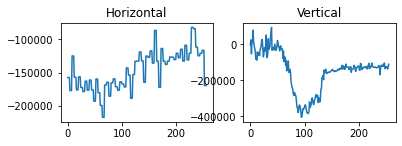

In [ ]:
histy=[]
histx=[]

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure()

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)


for i in range(256):
    tempy=0
    tempx=0
    for j in range(256):
        tempy=tempy+t_lanp[j][i]
        tempx=tempx+t_lanp[i][j]
    histy.append(tempy)
    histx.append(tempx)

ax1.plot(ii, histy)
ax2.plot(ii, histx)
#fig1=plt.plot(ii, histy)
#fig2=plt.plot(ii, histx)

ax1.set_title( 'Horizontal') #凡例
ax2.set_title( 'Vertical') #凡例

plt.show()

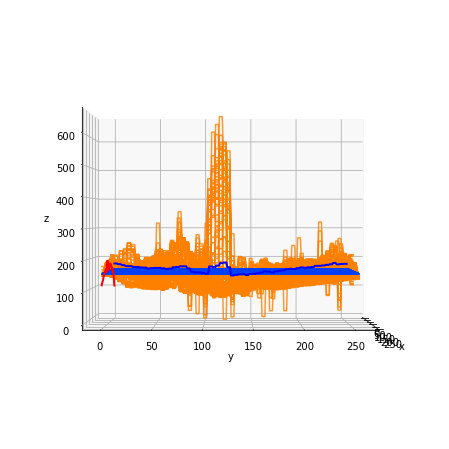

158.78963930663804


In [ ]:
xcell=256
ycell=64

col_names = [ 'c{0:02d}'.format(i) for i in range(xcell) ]
# 読んでみる csvファイル読み取り
df=pd.read_csv( r"20211025_001'_afm.csv", sep=',', names=col_names )
#print(df)

p_data_k=0

f_lanp_k=[]
for i in range(xcell):
    t=[]

    for j in range(ycell):
        for k in range(4):
            t.append(float(df['c{0:02d}'.format(i)][j+2]))
            p_data_k=p_data_k+float(df['c{0:02d}'.format(i)][j+2])

    f_lanp_k.append(t)

#print(f_lanp[1])

    
#print(len(f_lanp_k),len(f_lanp_k[0]),len(f_lanp_k[-1]))
#print(f_lanp_k[0],f_lanp_k[-1])


fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')

ii=[]
for i in range(xcell):
    ii.append(i)
    
for i in range(len(f_lanp_k)):
    pp=[]
    for j in range(len(f_lanp_k[i])):
        pp.append(i)
    

    ax.plot(pp,ii,f_lanp_k[i],color="#ff8000", alpha=0.8)
    #ax.plot(pp,ii,p0[i], alpha=0.5)
#ax.plot(0,0,256*256/p_data, alpha=0.1)


z=[]
for i in range(xcell):
    z.append(p_data_k/(xcell*xcell))
    
for i in range(xcell):
    pp=[]
    for j in range(xcell):
        pp.append(i)
    

    ax.plot(pp,ii,z,color="#0040ff", alpha=0.2)
    
#縦と横のヒストグラムの平均
histy=[]
histx=[]
z=[]

for i in range(xcell):
    tempy=0
    tempx=0
    z.append(0)
    
    for j in range(xcell):
        tempy=tempy+f_lanp_k[j][i]
        tempx=tempx+f_lanp_k[i][j]
                
    histy.append(tempy/xcell)
    histx.append(tempx/xcell)
    
ax.plot(z,ii, histy, color="blue", lw=2)
ax.plot(ii,z, histx, color="red", lw=2)

    # 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=0)    #elev:縦方向の回転()   azim:横方向の回転 


plt.savefig(r"cc")
plt.show()

print(p_data_k/(xcell*xcell))
        

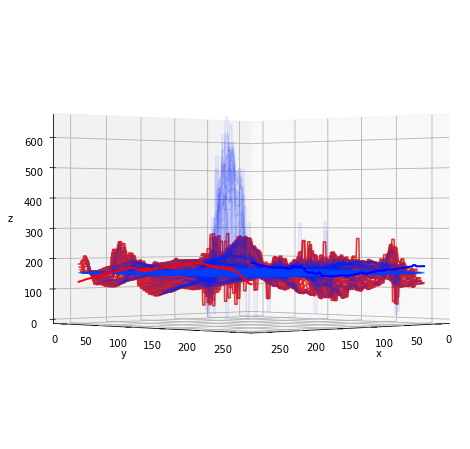

153.69663092040886


In [ ]:
m=p_data_k/(xcell*xcell)
s=0
p=0

for i in f_lanp_k:
    for j in i:
        s=s+(j-m)**2
        p=p+j
        
std=math.sqrt(s/(xcell*xcell))




t_lanp=[]
new_m=0
flug=0
for i in range(256):
    tl=[]
    for j in range(256):
        if f_lanp_k[i][j]>m+std*3:
            tl.append(m)
        elif f_lanp_k[i][j]<m-std*3:
            tl.append(m)
        else:
            tl.append(f_lanp_k[i][j])
            new_m=new_m+f_lanp_k[i][j]
        flug+=1
    t_lanp.append(tl)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')

ii=[]
for i in range(256):
    ii.append(i)
    
for i in range(len(t_lanp)):
    pp=[]
    for j in range(256):
        pp.append(i)
    

    ax.plot(pp,ii,t_lanp[i],color="#ff2000", alpha=0.9)
    #ax.plot(pp,ii,p0[i], alpha=0.5)

for i in range(len(f_lanp_k)):
    pp=[]
    for j in range(256):
        pp.append(i)
    

    ax.plot(pp,ii,f_lanp_k[i],color="#0020ff", alpha=0.1)
    #ax.plot(pp,ii,p0[i], alpha=0.5)
#ax.plot(0,0,256*256/p_data, alpha=0.1)


z=[]
for i in range(256):
    z.append(new_m/flug)
    
for i in range(256):
    pp=[]
    for j in range(256):
        pp.append(i)
    

    ax.plot(pp,ii,z,color="#0040ff", alpha=0.3)
    
#縦と横のヒストグラムの平均
histy=[]
histx=[]
z=[]

for i in range(256):
    tempy=0
    tempx=0
    z.append(0)
    
    for j in range(256):
        tempy=tempy+t_lanp[j][i]
        tempx=tempx+t_lanp[i][j]
                
    histy.append(tempy/256)
    histx.append(tempx/256)
    
ax.plot(z,ii, histy, color="blue", lw=2)
ax.plot(ii,z, histx, color="red", lw=2)


    # 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45)    #elev:縦方向の回転()   azim:横方向の回転 

plt.savefig(r"cccc")
plt.show()


print(new_m/flug)

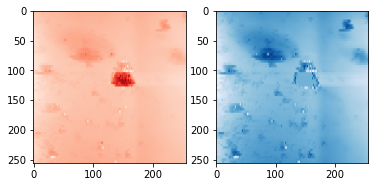

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#img = np.random.rand(10, 10)
#x = np.array([2,3,5,7,8,9,10,11,14,15])
#y = np.array([1,3,6,7,9,10,12,15,16,18])
#arr_2d = np.array(l_2d)

#xx, yy = np.meshgrid(x, y)

x=np.array(f_lanp_k)
y=np.array(t_lanp)

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure()

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#ax3 = fig.add_subplot(1, 3, 3)


ax1.imshow(x.T,cmap='Reds')
ax2.imshow(y.T,cmap='Reds')
#ax3.imshow(x*3,cmap='Blues')
#ax3.imshow(y*3,cmap='Reds', alpha=0.7)
plt.show()

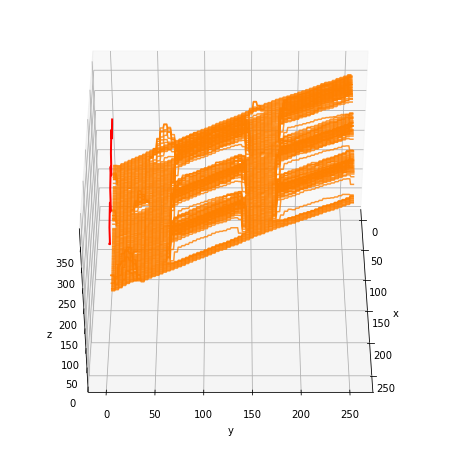

nan


In [ ]:
xcell=256
ycell=64

col_names = [ 'c{0:02d}'.format(i) for i in range(xcell) ]
# 読んでみる csvファイル読み取り
df=pd.read_csv( r"20210901.csv", sep=',', names=col_names )
#print(df)

p_data_k=0

f_lanp_k=[]
for i in range(xcell):
    t=[]

    for j in range(ycell):
        for k in range(4):
            t.append(float(df['c{0:02d}'.format(i)][j+2]))
            p_data_k=p_data_k+float(df['c{0:02d}'.format(i)][j+2])

    f_lanp_k.append(t)

#print(f_lanp[1])

    
#print(len(f_lanp_k),len(f_lanp_k[0]),len(f_lanp_k[-1]))
#print(f_lanp_k[0],f_lanp_k[-1])


fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')

ii=[]
for i in range(xcell):
    ii.append(i)
    
for i in range(len(f_lanp_k)):
    pp=[]
    for j in range(len(f_lanp_k[i])):
        pp.append(i)
    

    ax.plot(pp,ii,f_lanp_k[i],color="#ff8000", alpha=0.8)
    #ax.plot(pp,ii,p0[i], alpha=0.5)
#ax.plot(0,0,256*256/p_data, alpha=0.1)


z=[]
for i in range(xcell):
    z.append(p_data_k/(xcell*xcell))
    
for i in range(xcell):
    pp=[]
    for j in range(xcell):
        pp.append(i)
    

    ax.plot(pp,ii,z,color="#0040ff", alpha=0.2)
    
#縦と横のヒストグラムの平均
histy=[]
histx=[]
z=[]

for i in range(xcell):
    tempy=0
    tempx=0
    z.append(0)
    
    for j in range(xcell):
        tempy=tempy+f_lanp_k[j][i]
        tempx=tempx+f_lanp_k[i][j]
                
    histy.append(tempy/xcell)
    histx.append(tempx/xcell)
    
ax.plot(z,ii, histy, color="blue", lw=2)
ax.plot(ii,z, histx, color="red", lw=2)

    # 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=40, azim=0)    #elev:縦方向の回転()   azim:横方向の回転 


plt.savefig(r"cc")
plt.show()

print(p_data_k/(xcell*xcell))
        